# __Image Classification with CNN using Keras__

## __Task 1:__ Import Libraries

In [15]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.17.0
Is using GPU? False


## __Task 2:__ Preprocess Data

In [16]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)


    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [17]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test = get_three_classes(x_test, y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


## __Task 3:__ Visualize Examples

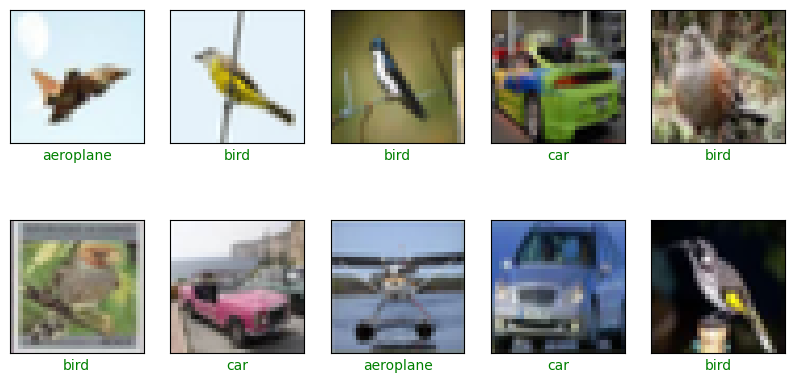

In [18]:
class_names = ['aeroplane', 'car', 'bird']

def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace = False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize = (10, 5))
    for i in range(10):
        plt.subplot(2, 5, 1 + i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])], color = col)
    plt.show()
    
    
show_random_examples(x_train, y_train, y_train)

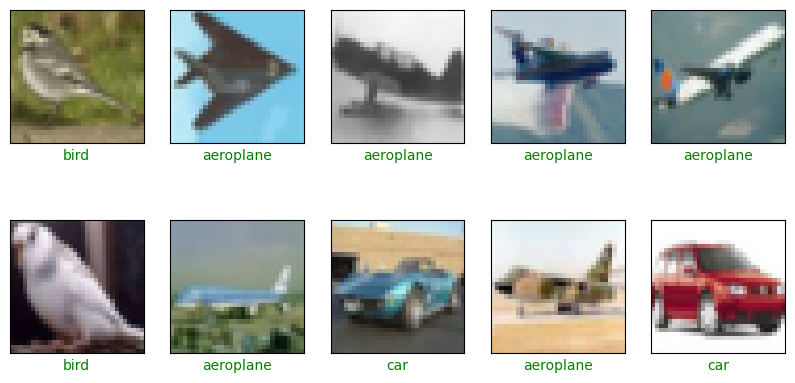

In [19]:
show_random_examples(x_test, y_test, y_test)

## __Task 4:__ Create Model

In [20]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    def add_conv_block(model, num_filters):
        model.add(Conv2D(num_filters, 3, activation = 'relu', padding = 'same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation = 'relu'))
        model.add(MaxPooling2D(pool_size = 2))
        model.add(Dropout(0.5))
        return model
    
    model = tf.keras.models.Sequential()
    model.add(Input(shape = (32, 32, 3))) # Check -- its not input()-- Input() is used to instantiate a Keras tensor

    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 128)

    model.add(Flatten())
    model.add(Dense(3 , activation = 'softmax'))

    model.compile(
        loss='categorical_crossentropy', 
        optimizer = 'adam', 
        metrics = ['accuracy']
        )

    return model

model = create_model()
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289,443 (1.10 MB)

 Trainable params: 288,995 (1.10 MB)

 Non-trainable params: 448 (1.75 KB)

## __Task 5:__ Train the Model

In [22]:
h = model.fit(
    x_train/225., y_train,
    validation_data = (x_train/225., y_train),
    epochs = 10, batch_size = 128,
    callbacks = [
                 tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience= 3),
                 tf.keras.callbacks.ModelCheckpoint(filepath=
                     'model_0.912.keras', save_best_only = True,
                      save_weights_only = False, monitor = 'val_accuracy'
                                                    )
                 ]
              )

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5688\2649447616.py:8: SyntaxWarning: invalid escape sequence '\m'
  '.\model_0.912.keras', save_best_only = True,


Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 392s 3s/step - accuracy: 0.5812 - loss: 1.2533 - val_accuracy: 0.3333 - val_loss: 2.7190
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 344s 3s/step - accuracy: 0.7658 - loss: 0.5768 - val_accuracy: 0.3344 - val_loss: 3.0949
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 458s 4s/step - accuracy: 0.7976 - loss: 0.5012 - val_accuracy: 0.3898 - val_loss: 2.2225
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 381s 3s/step - accuracy: 0.8221 - loss: 0.4392 - val_accuracy: 0.4410 - val_loss: 2.1664
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 448s 4s/step - accuracy: 0.8360 - loss: 0.4101 - val_accuracy: 0.4169 - val_loss: 2.5102
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 312s 3s/step - accuracy: 0.8438 - loss: 0.3958 - val_accuracy: 0.7697 - val_loss: 0.5929
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 464s 4s/step - accuracy: 0.8606 - loss: 0.3560 - val_accuracy: 0.6637 - val_loss: 1.1363
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 310s 3s/step - accuracy: 0.8622 - loss: 0.3518 - val_accu

## __Task 6:__ Final Predictions

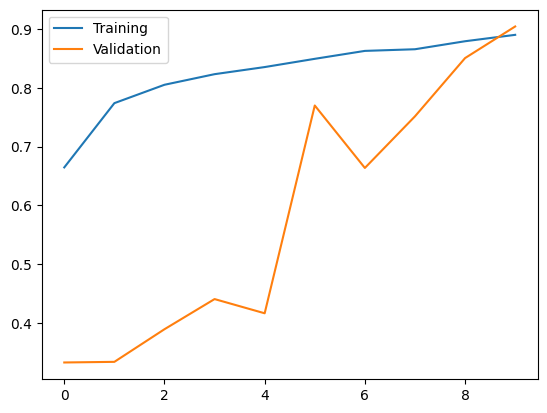

In [23]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)), accs, label = 'Training')
plt.plot(range(len(accs)), val_accs, label ='Validation')
plt.legend()
plt.show()

In [27]:
model = tf.keras.models.load_model('model_0.912.keras')

In [28]:
preds = model.predict(x_test/255.)

94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 225ms/step


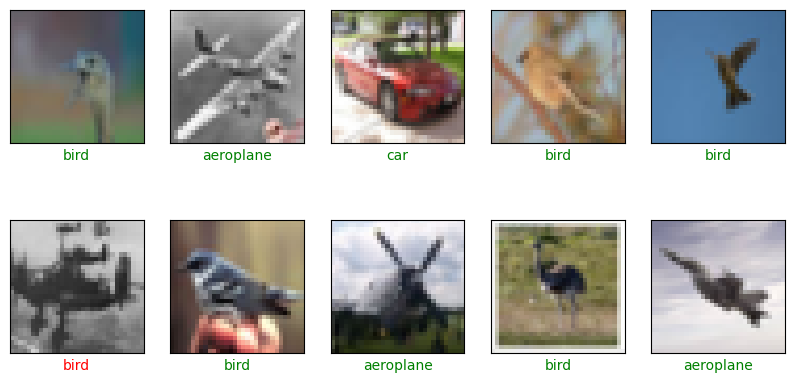

In [29]:
show_random_examples(x_test, y_test, preds)